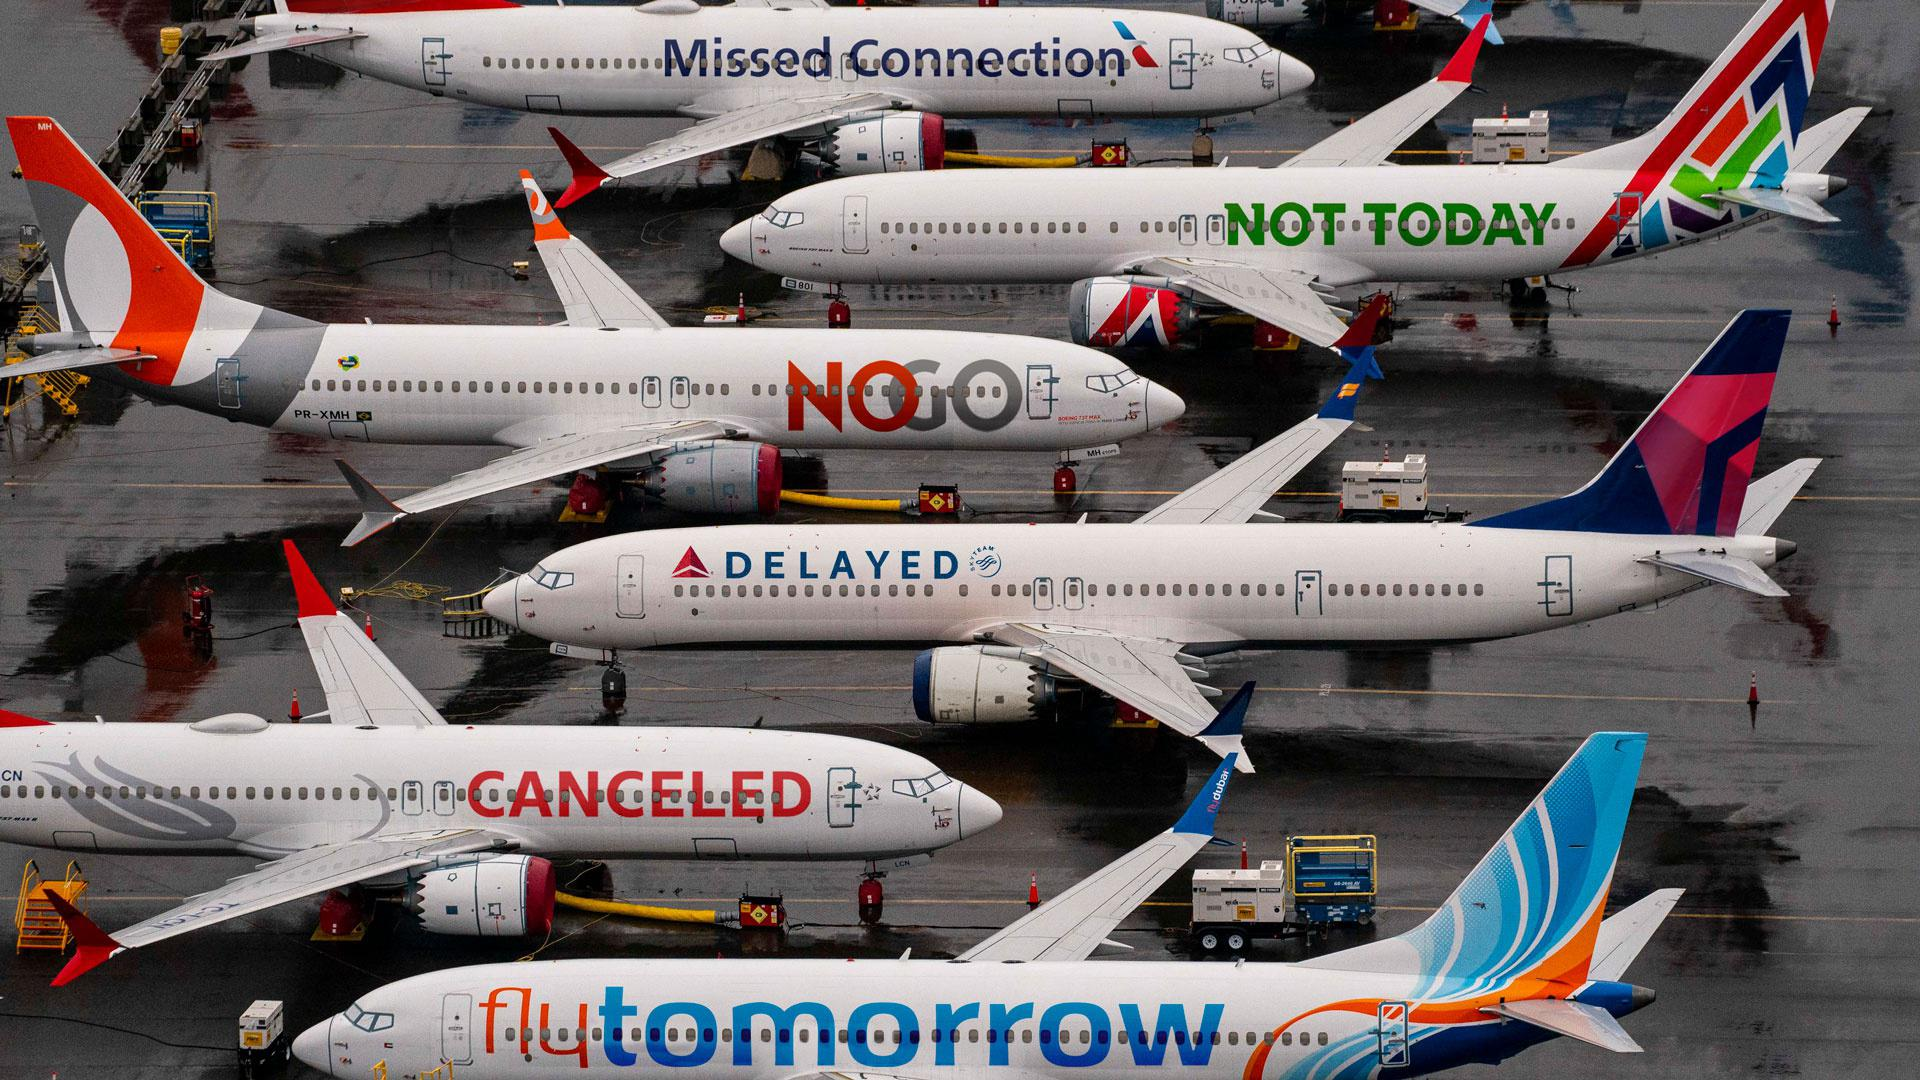

In [1]:
from IPython import display
display.Image('https://imageio.forbes.com/specials-images/imageserve//62bcda299f921d429670f110/0x0.jpg',
             width=500, height=400)

### Description:

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.

### Acknowledgements
The flight delay and cancellation data was collected and published by the DOT's Bureau of Transportation Statistics. The datasets used in this project are taken from Kaggle.

### Objective:
Our Main Objective is to predict whether a given flight will be cancelled. I will use different nachine learning classification models to make my predictions followed by choosing the best model.

### Some info:
Several reasons have been cited for the cancellation surge: bad weather, air traffic control issues, rising fuel prices and, most notably, airlines slow to replace personnel, both in the air and on the ground, who retired or took a leave of absence during the pandemic.
Source: https://news.asu.edu/20220712-global-engagement-airline-cancellations-have-personal-economical-impact 

Increasing industrial action and supply-side issues around staffing shortages are adding more noise to a sector that is already being impacted by the Russia-Ukraine conflict, higher oil prices and inflationary pressures.
Source: https://www.jpmorgan.com/insights/research/flight-cancellations-airline-industry


---

## <center> Step 1: Importing Libraries and Loading Datasets

In [2]:
import numpy as np     # linear algebra
import pandas as pd    # data processing, CSV file
import matplotlib.pyplot as plt     # plots
import seaborn as sns      # statistical plots

#For date-time
from datetime import datetime
from datetime import timedelta

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Keep the plot in the window
%matplotlib inline

In [3]:
# First let us load the datasets into different Dataframes
from IPython.display import display
path = 'D:/Other/My_DataScience_projects/2015_Flight_Delays_Cancellations/Data/'
def load_data(dataset):
    data = pd.read_csv(path+dataset, low_memory=False)
    data.name = dataset
    print(data.name)
    print('Shape:', data.shape)
    display(data.sample(10))
    print('-'*60)
    return data

df_flights = load_data('flights.csv')
df_airlines = load_data('airlines.csv')
df_features = load_data('airports.csv')

flights.csv
Shape: (5819079, 31)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
966759,2015,3,5,4,AA,2293,NaN,DFW,SFO,900,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
591824,2015,2,9,1,WN,495,N275WN,MDW,ATL,810,...,1106.0,6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5789777,2015,12,30,3,B6,2904,N658JB,SJU,JFK,205,...,612.0,72.0,0,0,NaN,0.0,0.0,0.0,72.0,0.0
18879,2015,1,2,5,DL,1100,N947DN,ATL,BOS,1005,...,1228.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
83225,2015,1,6,2,WN,3662,N924WN,MDW,AUS,940,...,1350.0,80.0,0,0,NaN,0.0,0.0,38.0,42.0,0.0
1500500,2015,4,7,2,WN,3026,N7727A,LIT,MDW,545,...,719.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2593372,2015,6,13,6,WN,947,N955WN,SJC,LAX,1055,...,1329.0,79.0,0,0,NaN,3.0,0.0,0.0,76.0,0.0
3250812,2015,7,22,3,WN,568,N8608N,MCO,MDW,1600,...,1748.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1977027,2015,5,6,3,UA,1112,N69819,MCO,IAD,1356,...,1652.0,43.0,0,0,NaN,27.0,0.0,0.0,0.0,16.0
2820561,2015,6,26,5,UA,1965,N78285,IAD,RDU,1810,...,2018.0,58.0,0,0,NaN,0.0,0.0,56.0,2.0,0.0


------------------------------------------------------------
airlines.csv
Shape: (14, 2)


,IATA_CODE,AIRLINE
2,US,US Airways Inc.
5,OO,Skywest Airlines Inc.
9,DL,Delta Air Lines Inc.
10,EV,Atlantic Southeast Airlines
0,UA,United Air Lines Inc.
4,B6,JetBlue Airways
8,WN,Southwest Airlines Co.
3,F9,Frontier Airlines Inc.
7,NK,Spirit Air Lines
12,MQ,American Eagle Airlines Inc.


------------------------------------------------------------
airports.csv
Shape: (322, 7)


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
60,CHS,Charleston International Airport/Charleston AFB,Charleston,SC,USA,32.89865,-80.04051
201,MHK,Manhattan Regional Airport,Manhattan,KS,USA,39.14097,-96.67083
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
296,STX,Henry E. Rohlsen Airport,Christiansted,VI,USA,17.70189,-64.79856
68,CMI,University of Illinois - Willard Airport,Champaign/Urbana,IL,USA,40.03925,-88.27806
123,GGG,East Texas Regional Airport,Longview,TX,USA,32.38486,-94.71171
206,MLB,Melbourne International Airport,Melbourne,FL,USA,28.10275,-80.64581
276,SDF,Louisville International Airport (Standiford Field),Louisville,KY,USA,38.17439,-85.73600
268,SAN,San Diego International Airport (Lindbergh Field),San Diego,CA,USA,32.73356,-117.18966
278,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484


------------------------------------------------------------


### Joining/Merging

In [4]:
# merging flights with airlines datasets
df = df_flights.merge(df_airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819079 entries, 0 to 5819078
Data columns (total 33 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE_x            object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [5]:
# dropping old column and rename new one
df = df.drop(['AIRLINE_x','IATA_CODE'], axis=1)
df = df_flights.rename(columns={"AIRLINE_y":"AIRLINE"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

Each entry of the `flights.csv` file corresponds to a flight and we see that more than 5'800'000 flights have been recorded in 2015. These flights are described according to 31 variables. A description of these variables can be found [here](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time) (and [here](https://www.kaggle.com/datasets/usdot/flight-delays?datasetId=810&sortBy=voteCount&select=flights.csv)) and I briefly recall the meaning of the variables that will be used in this notebook:

- **YEAR, MONTH, DAY, DAY_OF_WEEK**: dates of the flight <br/>
- **AIRLINE**: An identification number assigned by US DOT to identify a unique airline <br/>
- **ORIGIN_AIRPORT** and **DESTINATION_AIRPORT**: code attributed by IATA to identify the airports <br/>
- **SCHEDULED_DEPARTURE** and **SCHEDULED_ARRIVAL** : scheduled times of take-off and landing <br/> 
- **DEPARTURE_TIME** and **ARRIVAL_TIME**: real times at which take-off and landing took place <br/> 
- **DEPARTURE_DELAY** and **ARRIVAL_DELAY**: difference (in minutes) between planned and real times <br/> 
- **DISTANCE**: distance (in miles)  <br/>
- **TAXI_OUT**: The time duration elapsed between departure from the origin airport gate and wheels off  <br/>
- **TAXI_IN**: The time duration elapsed between wheels-on and gate arrival at the destination airport  <br/>
- **AIR_TIME**: The time duration between wheels_off and wheels_on time  <br/>
- **ELAPSED_TIME**: TAXI_OUT + AIR_TIME + TAXI_IN   <br/>
- **SCHEDULED_TIME**: Planned time amount needed for the flight trip   <br/>
- **CANCELLED**: Flight Cancelled (1 = cancelled)   <br/>
- **CANCELLATION_REASON**: Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security   <br/>


An additional file of this dataset, the `airports.csv` file, gives a more exhaustive description of the airports:

### Take a sample of the data

In [6]:
# Since the dataset is too large (~ 5.8 million rows, I will take a sample of it)
# The sample is 10% of total flights (~ 582 thousand rows)
df_sample = df.sample(frac =.1)

In [7]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581908 entries, 3017121 to 1412055
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 581908 non-null  int64  
 1   MONTH                581908 non-null  int64  
 2   DAY                  581908 non-null  int64  
 3   DAY_OF_WEEK          581908 non-null  int64  
 4   AIRLINE              581908 non-null  object 
 5   FLIGHT_NUMBER        581908 non-null  int64  
 6   TAIL_NUMBER          580371 non-null  object 
 7   ORIGIN_AIRPORT       581908 non-null  object 
 8   DESTINATION_AIRPORT  581908 non-null  object 
 9   SCHEDULED_DEPARTURE  581908 non-null  int64  
 10  DEPARTURE_TIME       573308 non-null  float64
 11  DEPARTURE_DELAY      573308 non-null  float64
 12  TAXI_OUT             573027 non-null  float64
 13  WHEELS_OFF           573027 non-null  float64
 14  SCHEDULED_TIME       581908 non-null  float64
 15  ELAPSED_TI

## <center> Step 2: Data Preparation

### Dates and times

#### Adding some useful columns ####

 1. I add a column with the date in datetime format to make easier plotting the data.
 2. I add a columns with the month name
 3. I add a column with the day of the week name


In [8]:
# 1. Date
df_sample['DATE'] = pd.to_datetime(df_sample[['YEAR','MONTH','DAY']],
                                 yearfirst=True)

# 2. Month name
month_dict={
    1:  '01 - January',
    2:  '02 - February',
    3:  '03 - March',
    4:  '04 - April',
    5:  '05 - May',
    6:  '06 - June',
    7:  '07 - July',
    8:  '08 - August',
    9:  '09 - September',
    10: '10 - October',
    11: '11 - November',
    12: '12 - December'
}
df_sample['MONTH_descript'] = df_sample['MONTH'].apply(lambda m: month_dict[m])

# 3. Day of the week name
dow_dict = {
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday',
    7: 'Monday'
}
df_sample['DOW_descript'] = df_sample['DAY_OF_WEEK'].apply(lambda d: dow_dict[d])
df_sample.head()

Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,MONTH_descript,DOW_descript
3017121,2015,7,8,3,AA,1717,N668AW,BWI,CLT,1915,...,0,NaN,0.0,0.0,0.0,43.0,0.0,2015-07-08,07 - July,Thursday
2023883,2015,5,9,6,EV,5229,N717EV,ATL,XNA,1109,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-09,05 - May,Sunday
1616634,2015,4,14,2,AA,1095,N3EMAA,PHX,DFW,836,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,04 - April,Wednesday
742677,2015,2,18,3,WN,4279,N250WN,PHX,MCI,2010,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-18,02 - February,Thursday
3783081,2015,8,23,7,UA,1585,N73445,ORD,ALB,1347,...,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-23,08 - August,Monday


Some variables (shown below) are coded as a float where the two first digits indicate the hour and the two last, the minutes. This format is not convenient and I will drop them. There are other columns that we can use instead.

In [9]:
variables_to_remove = ['SCHEDULED_DEPARTURE','DEPARTURE_TIME',
                       'WHEELS_OFF','WHEELS_ON',
                       'SCHEDULED_ARRIVAL','ARRIVAL_TIME']

In [10]:
df_sample.drop(variables_to_remove, axis = 1, inplace = True)

### Airlines

I will add a column with the name of the airline that operates each flight

In [11]:
# The airlines dataframe provides us the IATA code for each airline. 
# We can use this data to create a dictionary to use it later.
airlines_dict = dict(zip(df_airlines['IATA_CODE'],df_airlines['AIRLINE']))
airlines_dict

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

In [12]:
df_sample['AIRLINE_descript'] = df_sample['AIRLINE'].apply(lambda a: airlines_dict[a])
df_sample.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,...,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,MONTH_descript,DOW_descript,AIRLINE_descript
3017121,2015,7,8,3,AA,1717,N668AW,BWI,CLT,50.0,...,NaN,0.0,0.0,0.0,43.0,0.0,2015-07-08,07 - July,Thursday,American Airlines Inc.
2023883,2015,5,9,6,EV,5229,N717EV,ATL,XNA,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-09,05 - May,Sunday,Atlantic Southeast Airlines
1616634,2015,4,14,2,AA,1095,N3EMAA,PHX,DFW,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,04 - April,Wednesday,American Airlines Inc.
742677,2015,2,18,3,WN,4279,N250WN,PHX,MCI,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-18,02 - February,Thursday,Southwest Airlines Co.
3783081,2015,8,23,7,UA,1585,N73445,ORD,ALB,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-23,08 - August,Monday,United Air Lines Inc.


#### fill missing data (NaN)

In [13]:
df_sample.isna().sum(axis=0)

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER              1537
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
DEPARTURE_DELAY          8600
TAXI_OUT                 8881
SCHEDULED_TIME              0
ELAPSED_TIME            10541
AIR_TIME                10541
DISTANCE                    0
TAXI_IN                  9265
ARRIVAL_DELAY           10541
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON    572940
AIR_SYSTEM_DELAY       476047
SECURITY_DELAY         476047
AIRLINE_DELAY          476047
LATE_AIRCRAFT_DELAY    476047
WEATHER_DELAY          476047
DATE                        0
MONTH_descript              0
DOW_descript                0
AIRLINE_descript            0
dtype: int64

Let's clean the dataframe to get the columns we will use for the analysis. For analyzing flight cancellations, I will not need the reasons for delays.

In [14]:
df_sample.drop(['AIR_SYSTEM_DELAY','SECURITY_DELAY',
                'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY',
                'WEATHER_DELAY'], axis = 1, inplace = True)

I will fill the NaN for some columns with 0 and some with the mean of that column based on the isntinct of the column.

In [15]:
for i in ['TAXI_OUT','TAXI_IN','AIR_TIME','ELAPSED_TIME']:
    df_sample[i].fillna(df_sample[i].mean(),inplace=True)

In [16]:
df_sample.isna().sum(axis=0)

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER              1537
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
DEPARTURE_DELAY          8600
TAXI_OUT                    0
SCHEDULED_TIME              0
ELAPSED_TIME                0
AIR_TIME                    0
DISTANCE                    0
TAXI_IN                     0
ARRIVAL_DELAY           10541
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON    572940
DATE                        0
MONTH_descript              0
DOW_descript                0
AIRLINE_descript            0
dtype: int64

In [17]:
# we can fill the remaining NaN columns with 0
df_sample = df_sample.fillna(0)
df_sample.isna().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
DEPARTURE_DELAY        0
TAXI_OUT               0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
TAXI_IN                0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
DATE                   0
MONTH_descript         0
DOW_descript           0
AIRLINE_descript       0
dtype: int64

### Data exploration (EDA)

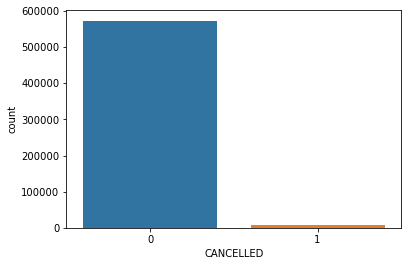

In [18]:
# number of flights cancelled
sns.countplot(df_sample['CANCELLED'])
plt.show()

In [19]:
# ratio of flights cancelled
cancelled = df_sample[df_sample['CANCELLED'] == 1].count()['CANCELLED']
scheduled = df_sample.shape[0]
ratio_cancel = round((cancelled / scheduled) * 100,2)

print("Scheduled flights: ", scheduled)
print("Cancelled flights: ", cancelled)
print("\n")
print("Ratio of cancelled flights over scheduled flights: %s" % ratio_cancel,'%')

Scheduled flights:  581908
Cancelled flights:  8968


Ratio of cancelled flights over scheduled flights: 1.54 %


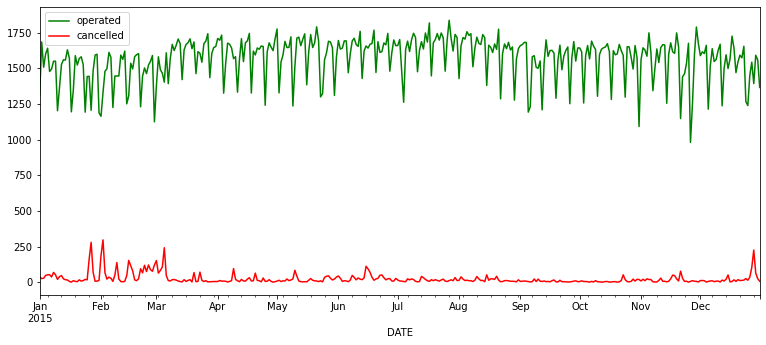

In [20]:
fig = plt.figure(figsize=(10,4));

ax = fig.add_axes([0,0,1,1]);

df_sample[df_sample['CANCELLED'] == 0].groupby('DATE').count()['CANCELLED'].plot.line(c='g', label="operated");
df_sample[df_sample['CANCELLED'] == 1].groupby('DATE').count()['CANCELLED'].plot.line(c='r', label="cancelled");

ax.legend();

From the plot we can observe that:

 1. Total operated flights varies depending on the season. There are more flights on Summer months and we can see a little increment of flights during Christmas hollidays.
 2. On the first half of September there's a remarkable decrease of scheduled flights. Maybe because of the 9/11 psychologic impact.
 3. In the end of January, in February, and in the begining of March there were a lot of cancellations. Those cancellations could be caused by bad weather.

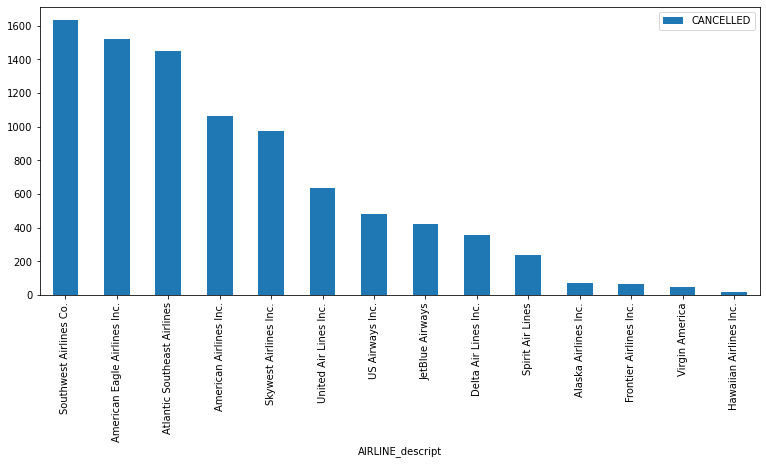

In [21]:
fig = plt.figure(figsize=(10,4));

ax = fig.add_axes([0,0,1,1]);

df_sample[df_sample['CANCELLED'] == 1].groupby('AIRLINE_descript').count()['CANCELLED'].sort_values(ascending = False).plot.bar();

ax.legend();

We can see that American Airlines followed by Southwest Airlines have highest number of cancellations.

In [22]:
# Cancellation reasons 
# (A - Airline/Carrier; B - Weather; C - National Air System; D - Security)
df_sample['CANCELLATION_REASON'].value_counts(dropna=True)

0    572940
B      4861
A      2594
C      1506
D         7
Name: CANCELLATION_REASON, dtype: int64

We can see that the main reason for cancellations is related to **weather** followed by **Airline** related issues

In [23]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581908 entries, 3017121 to 1412055
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   YEAR                 581908 non-null  int64         
 1   MONTH                581908 non-null  int64         
 2   DAY                  581908 non-null  int64         
 3   DAY_OF_WEEK          581908 non-null  int64         
 4   AIRLINE              581908 non-null  object        
 5   FLIGHT_NUMBER        581908 non-null  int64         
 6   TAIL_NUMBER          581908 non-null  object        
 7   ORIGIN_AIRPORT       581908 non-null  object        
 8   DESTINATION_AIRPORT  581908 non-null  object        
 9   DEPARTURE_DELAY      581908 non-null  float64       
 10  TAXI_OUT             581908 non-null  float64       
 11  SCHEDULED_TIME       581908 non-null  float64       
 12  ELAPSED_TIME         581908 non-null  float64       
 13  AIR_TIM

##### Let's drop unwanted variables for further analysis

In [24]:
# Let's drop unwanted variables for further analysis
variables_remove = ['YEAR','DAY_OF_WEEK','FLIGHT_NUMBER', 'TAIL_NUMBER',
                    'DIVERTED','DATE','MONTH_descript','DOW_descript',
                   'AIRLINE_descript']
df_sample.drop(variables_remove, axis = 1, inplace = True)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581908 entries, 3017121 to 1412055
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                581908 non-null  int64  
 1   DAY                  581908 non-null  int64  
 2   AIRLINE              581908 non-null  object 
 3   ORIGIN_AIRPORT       581908 non-null  object 
 4   DESTINATION_AIRPORT  581908 non-null  object 
 5   DEPARTURE_DELAY      581908 non-null  float64
 6   TAXI_OUT             581908 non-null  float64
 7   SCHEDULED_TIME       581908 non-null  float64
 8   ELAPSED_TIME         581908 non-null  float64
 9   AIR_TIME             581908 non-null  float64
 10  DISTANCE             581908 non-null  int64  
 11  TAXI_IN              581908 non-null  float64
 12  ARRIVAL_DELAY        581908 non-null  float64
 13  CANCELLED            581908 non-null  int64  
 14  CANCELLATION_REASON  581908 non-null  object 
dtypes: float64

### Feature Encoding

In [25]:
# Label Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder

In [26]:
### Creating Dummy Variables from Object (categorical) Columns
df_nums = df_sample.select_dtypes(exclude='object')
df_objs = df_sample.select_dtypes(include='object')

# Creating an instance of labelencoder
labelenc = LabelEncoder()

# Assinging values to categories
for feat in df_objs:
    df_objs[feat] = labelenc.fit_transform(df_objs[feat].astype(str))

df_sample = pd.concat([df_nums,df_objs],axis=1)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581908 entries, 3017121 to 1412055
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                581908 non-null  int64  
 1   DAY                  581908 non-null  int64  
 2   DEPARTURE_DELAY      581908 non-null  float64
 3   TAXI_OUT             581908 non-null  float64
 4   SCHEDULED_TIME       581908 non-null  float64
 5   ELAPSED_TIME         581908 non-null  float64
 6   AIR_TIME             581908 non-null  float64
 7   DISTANCE             581908 non-null  int64  
 8   TAXI_IN              581908 non-null  float64
 9   ARRIVAL_DELAY        581908 non-null  float64
 10  CANCELLED            581908 non-null  int64  
 11  AIRLINE              581908 non-null  int32  
 12  ORIGIN_AIRPORT       581908 non-null  int32  
 13  DESTINATION_AIRPORT  581908 non-null  int32  
 14  CANCELLATION_REASON  581908 non-null  int32  
dtypes: float64

In [27]:
df_sample.head()

,MONTH,DAY,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,CANCELLED,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON
3017121,7,8,50.0,11.0,85.0,78.0,56.0,361,11.0,43.0,0,0,356,369,0
2023883,5,9,0.0,12.0,111.0,110.0,95.0,589,3.0,-1.0,0,4,325,622,0
1616634,4,14,0.0,18.0,144.0,139.0,115.0,868,6.0,-5.0,0,0,544,389,0
742677,2,18,-4.0,17.0,150.0,145.0,124.0,1044,4.0,-9.0,0,13,544,495,0
3783081,8,23,3.0,24.0,118.0,115.0,86.0,723,5.0,0.0,0,10,533,317,0


### Feature selection / reduction

In [28]:
# Let's print the correlation of features with 'ARRIVAL_DELAY'
df_sample.corr()['CANCELLED'][:].sort_values(ascending=False)

CANCELLED              1.000000e+00
CANCELLATION_REASON    9.415046e-01
DESTINATION_AIRPORT    1.258223e-02
ORIGIN_AIRPORT         1.221442e-02
AIRLINE                6.890795e-03
TAXI_OUT               3.794093e-04
ELAPSED_TIME           2.777850e-17
TAXI_IN                4.018273e-18
AIR_TIME              -9.197842e-18
DAY                   -3.339805e-03
ARRIVAL_DELAY         -1.380699e-02
DEPARTURE_DELAY       -2.235737e-02
SCHEDULED_TIME        -2.748780e-02
DISTANCE              -3.239439e-02
MONTH                 -5.585592e-02
Name: CANCELLED, dtype: float64

In [29]:
# Let's drop not highly correlated (let's say less than 0.1) (only drop numeric corr)). 

df_sample = df_sample.drop(['ELAPSED_TIME','TAXI_IN','AIR_TIME'], axis=1)

# We also need to drop "CANCELLATION_REASON" because it's highly correlated.
# When there is a CANCELLATION_REASON, the flight is cancelled

df_sample = df_sample.drop(['CANCELLATION_REASON'], axis=1)

df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581908 entries, 3017121 to 1412055
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                581908 non-null  int64  
 1   DAY                  581908 non-null  int64  
 2   DEPARTURE_DELAY      581908 non-null  float64
 3   TAXI_OUT             581908 non-null  float64
 4   SCHEDULED_TIME       581908 non-null  float64
 5   DISTANCE             581908 non-null  int64  
 6   ARRIVAL_DELAY        581908 non-null  float64
 7   CANCELLED            581908 non-null  int64  
 8   AIRLINE              581908 non-null  int32  
 9   ORIGIN_AIRPORT       581908 non-null  int32  
 10  DESTINATION_AIRPORT  581908 non-null  int32  
dtypes: float64(4), int32(3), int64(4)
memory usage: 62.7 MB


# Step 3: Data Splitting

In [30]:
X = df_sample.drop('CANCELLED',axis=1)
y = df_sample['CANCELLED']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Feature scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# Step 4: Model Creation, Fit, Predict
## Step 5: Evaluate the models

### Logistic Regression Model

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
# log_model.coef_
log_preds = log_model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [38]:
log_accuracy_score = accuracy_score(y_test,log_preds)
log_accuracy_score

0.9842759189565397

In [39]:
confusion_matrix(y_test,log_preds)

array([[171828,      0],
       [  2745,      0]], dtype=int64)

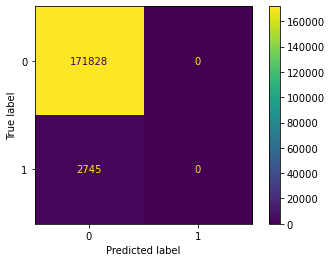

In [58]:
plot_confusion_matrix(log_model,X_test,y_test)

In [41]:
print(classification_report(y_test,log_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    171828
           1       0.00      0.00      0.00      2745

    accuracy                           0.98    174573
   macro avg       0.49      0.50      0.50    174573
weighted avg       0.97      0.98      0.98    174573



In [42]:
## Evaluating Curves and AUC
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

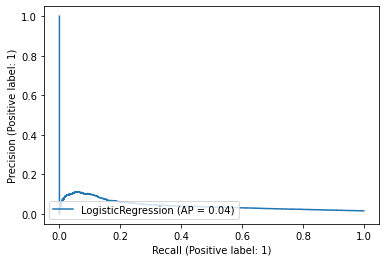

In [43]:
plot_precision_recall_curve(log_model,X_test,y_test)

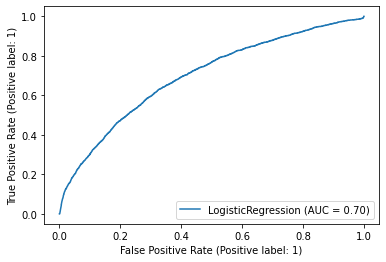

In [44]:
plot_roc_curve(log_model,X_test,y_test)

### KNN -  K Nearest Neighbors - Classification

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
knn_preds = knn_model.predict(X_test)
knn_accuracy_score = accuracy_score(y_test,knn_preds)
knn_accuracy_score

0.9850893322564199

In [47]:
confusion_matrix(y_test,knn_preds)

array([[170908,    920],
       [  1683,   1062]], dtype=int64)

In [48]:
print(classification_report(y_test,knn_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    171828
           1       0.54      0.39      0.45      2745

    accuracy                           0.99    174573
   macro avg       0.76      0.69      0.72    174573
weighted avg       0.98      0.99      0.98    174573



### Random Forest - Classification

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)
RF_model_preds = RF_model.predict(X_test)
RF_model_accuracy_score = accuracy_score(y_test,RF_model_preds)
RF_model_accuracy_score

0.9998281521197436

In [51]:
confusion_matrix(y_test,RF_model_preds)

array([[171828,      0],
       [    30,   2715]], dtype=int64)

In [52]:
print(classification_report(y_test,RF_model_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    171828
           1       1.00      0.99      0.99      2745

    accuracy                           1.00    174573
   macro avg       1.00      0.99      1.00    174573
weighted avg       1.00      1.00      1.00    174573



### Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
GB_model = GradientBoostingClassifier()
GB_model.fit(X_train,y_train)
GB_model_preds = GB_model.predict(X_test)
GB_model_accuracy_score = accuracy_score(y_test,GB_model_preds)
GB_model_accuracy_score

0.9998224238570684

In [55]:
confusion_matrix(y_test,GB_model_preds)

array([[171828,      0],
       [    31,   2714]], dtype=int64)

In [56]:
print(classification_report(y_test,GB_model_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    171828
           1       1.00      0.99      0.99      2745

    accuracy                           1.00    174573
   macro avg       1.00      0.99      1.00    174573
weighted avg       1.00      1.00      1.00    174573



It seems like Random Forest followed by Gradiant Boosting models give me the best results with 99% accuaracy rate.